#**SIT 720 - Machine Learning**

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

#**Assessment Task 2 (30 marks)**

##**Submission Instruction**
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A2_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [1]:
# Student ID: 219351188

# Student name: Shoaib Maqbool

## Part 1: Clustering *(15 marks)*

Let's assume you want to design an environment to predict a class/category from a dataset based on specific features of that class. However, all the features are not strong enough or in other words features not that much variance/uniqueness across the classes. So, you have to design a clustering model by answering the following questions:

1. Download the attached clustering.csv file. Read the file and separate the class and feature matrix. __(2 marks)__

In [1]:
# INSERT your code (or comment) here
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from pyclustering.utils.metric import distance_metric, type_metric
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from sklearn.feature_selection import SelectKBest,chi2,f_classif



In [2]:
data = np.genfromtxt("clustering.csv", delimiter=",", skip_header=1)
lst = [7]
features = (np.delete(data,lst,1))
clusters = (np.delete(data,[0,1,2,3,4,5,6],1))

2. Determine the number of clusters from the dataset. Is this same as the actual number of classes in the dataset? __(1 marks)__

<!-- Choose the best three features using different selection criteria (ANOVA, Chi-squared) based on the purity score for the k-mean cluster (Euclidean distance matrix). Which one is good and why? __(5 marks)__ -->

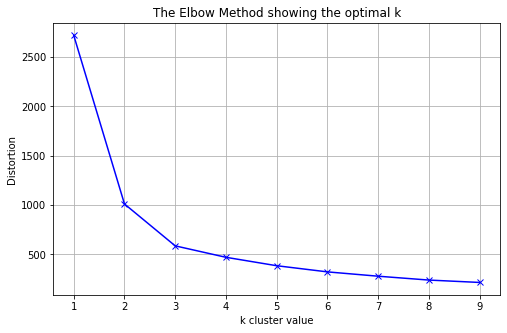

In [3]:

#Using elbow method to determine the clusters
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(features)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k cluster value')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.grid()
plt.show()


3. Perform K-Means clustering on the complete dataset and report purity score. __(2 marks)__ 

In [4]:
# INSERT your code (or comment) here

kmeans = KMeans(n_clusters=3) #n_clusters define the number of clusters to find
kmeans.fit(features) # we use .fit() to fit the data (learning)

centroids = kmeans.cluster_centers_
pred_clusters    = kmeans.labels_

for i in range(len(features)):
    print("Data Point: ",features[i]," Cluster: ",pred_clusters[i])

Data Point:  [15.26  14.84   0.871  5.763  3.312  2.221  5.22 ]  Cluster:  2
Data Point:  [14.88   14.57    0.8811  5.554   3.333   1.018   4.956 ]  Cluster:  2
Data Point:  [14.29  14.09   0.905  5.291  3.337  2.699  4.825]  Cluster:  2
Data Point:  [13.84   13.94    0.8955  5.324   3.379   2.259   4.805 ]  Cluster:  2
Data Point:  [16.14   14.99    0.9034  5.658   3.562   1.355   5.175 ]  Cluster:  2
Data Point:  [14.38   14.21    0.8951  5.386   3.312   2.462   4.956 ]  Cluster:  2
Data Point:  [14.69   14.49    0.8799  5.563   3.259   3.586   5.219 ]  Cluster:  2
Data Point:  [14.11   14.1     0.8911  5.42    3.302   2.7     5.    ]  Cluster:  2
Data Point:  [16.63   15.46    0.8747  6.053   3.465   2.04    5.877 ]  Cluster:  2
Data Point:  [16.44  15.25   0.888  5.884  3.505  1.969  5.533]  Cluster:  2
Data Point:  [15.26   14.85    0.8696  5.714   3.242   4.543   5.314 ]  Cluster:  2
Data Point:  [14.03   14.16    0.8796  5.438   3.201   1.717   5.001 ]  Cluster:  2
Data Point:  

In [5]:
# Purity Score function
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 


In [6]:
#Finding purity between predicted clusters and ground truth
print('The Purity is {}%'.format(round((purity_score(clusters,pred_clusters))*100),2))

The Purity is 90%


4. There are several distance metrics for  K-Means such as euclidean, squared euclidean, Manhattan, Chebyshev, Minkowski. [ __Hints:__ See the pyclustering library for python.]
    - Your job is to compare the purity score of k-means clustering for different distance metrics. __(5 marks)__ 
    - Select the best distance metric and explain why this distance metric is best for the given dataset. __(2 marks)__ 

In [16]:
## KMeans using the Euclidean Distance
print('Which Distance metric You want to select to perform KMeans')
print('Press 1 for Euclidean')
print('Press 2 for Square Euclidean')
print('Press 3 for Manhattan')
print('Press 4 for Chebyshev')
print('Press 5 for Minkowski')
print('')
num = int(input("Enter Number: "))


if num ==1:
        metric = distance_metric(type_metric.EUCLIDEAN)
        metric_name = 'Euclidean'
elif num ==2:
        metric = distance_metric(type_metric.EUCLIDEAN_SQUARE)
        metric_name = 'Squared Euclidean'
elif num ==3:
        metric = distance_metric(type_metric.MANHATTAN)
        metric_name = 'Manhattan'
elif num ==4:
        metric = distance_metric(type_metric.CHEBYSHEV)
        metric_name = 'Chebyshev'
elif num ==5:
        metric = distance_metric(type_metric.MINKOWSKI,degree=4)
        metric_name = 'Minkowski'
else:
    print("Incorrect Num! \nRe-Run the Cell")
    import sys 
    sys.exit()
    
  
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
#Prepare initial centers using K-Means++ method.
initial_centers = kmeans_plusplus_initializer(data, 3).initialize()
# Create instance of K-Means algorithm with prepared centers
kmeans_instance = kmeans(data, initial_centers,metric = metric)

# Run cluster analysis and obtain results.
kmeans_instance.process()
py_pred_clusters = kmeans_instance.get_clusters()
py_centers = kmeans_instance.get_centers()

from itertools import repeat
#Encoding the obtained cluster result
cluster0 = list(repeat(0,len(py_pred_clusters[0])))  
cluster1 = list(repeat(1,len(py_pred_clusters[1])))
cluster2 = list(repeat(2,len(py_pred_clusters[2])))
py_pred_clusters = cluster0
for val in cluster1:
    py_pred_clusters.append(val)
for val in cluster2:
    py_pred_clusters.append(val)
    
py_pred_clusters= np.array(py_pred_clusters)
score = purity_score(clusters,py_pred_clusters)

print('Purity score with Kmeans predicted clusters using {} metric is {}%'.format(metric_name,round(score*100,2)))
   

    

Which Distance metric You want to select to perform KMeans
Press 1 for Euclidean
Press 2 for Square Euclidean
Press 3 for Manhattan
Press 4 for Chebyshev
Press 5 for Minkowski

Enter Number: 6
Incorrect Num! 
Re-Run the Cell


SystemExit: 

C:\Users\Shoib\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Lookng at the purity scores of all the distances, I can certainly say that considering my dataset, Manhattan distance metric seems the best amongst all as it provides the highest purity when compared to the ground Truth

5. Use selection criteria (ANOVA, Chi-squared) to select best three features and use them for K-Means clustering. __(3 marks)__

In [14]:
# Feature extraction


print('Which selecttion criteria out of ANOVA and Chi2 do you want to you?')
print('Press 1 for Chi2')
print('Press 2 for Anova')
print('')
num = int(input("Enter Number: "))


if num ==1:
        Chi_test = SelectKBest(score_func=chi2, k=3)
        best_feat = Chi_test.fit_transform(data,clusters)
        # Summarize scores
        chi_Kmean = KMeans(n_clusters=3)
        chi_Kmean.fit(best_feat)
        print('Purity score by selecting 3 best features using Chi2 Selection criteria is {}%'.format(round(purity_score(clusters,chi_Kmean.labels_)*100,2)))

elif num ==2:
        Anova_test = SelectKBest(f_classif, k=3)
        best_feat = Anova_test.fit_transform(data,clusters)

        # Summarize scores
        Anova_Kmean = KMeans(n_clusters=3)
        Anova_Kmean.fit(best_feat)
        print('Purity score by selecting 3 best features using Anova Selection criteria is {}%'.format(round(purity_score(clusters,Anova_Kmean.labels_)*100,2)))

       

else:
    print('Invalid entry! Re-run the cell')





Which selecttion criteria out of ANOVA and Chi2 do you want to you?
Press 1 for Chi2
Press 2 for Anova

Enter Number: 5
Invalid entry! Re-run the cell


# INSERT your code (or comment) here

By looking at the priority score of Chi2 and Anova which is 93% and 89% respectively, I would recommend Chi2 over Anova as it provides more accurate feautures than Anova when compared to the Ground Truth.

# Part-2 (Dimensionality Reduction using PCA/SVD) *(15 marks)*

1. For the dataset (clustering.csv), perform PCA.
    - plot the captured variance with respect to increasing latent dimensionality. __(2.5 marks)__
  
  What is the minimum dimension that captures:
    - at least 89% variance? __(1.5 marks)__
    - at least 99% variance? __(1 marks)__

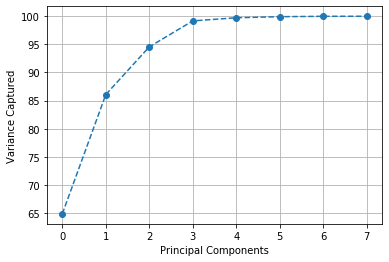

In [17]:
# INSERT your code (or comment) here

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

Xnorm = scale(data)
pca = PCA()
pca.fit(Xnorm)


var = pca.explained_variance_ratio_

var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1
plt.plot(var1, marker = 'o',linestyle = '--')
plt.xlabel("Principal Components")
plt.ylabel("Variance Captured")
plt.grid()
plt.show()



2. Determine the purity of clusters formed by the number of principal components which captured 89% and 99% variances respectively. Plot a line graph of the purity scores against the captured variances. Discuss your findings. __(7 marks)__

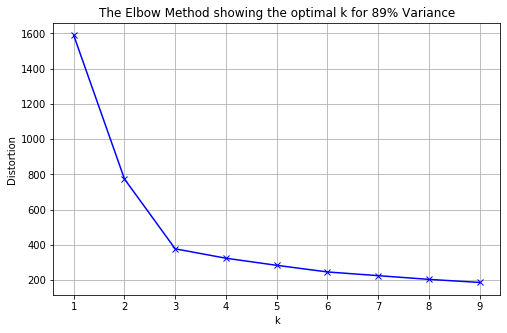

Purity Score using 3 PCA components which capture 89% Variance is 97.14%
------------------------------------------


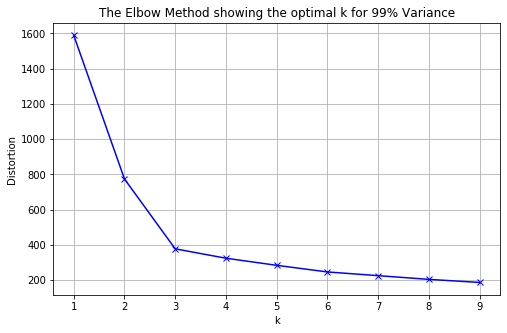

Purity Score using 4 PCA components which capture 99% Variance is 98.1%


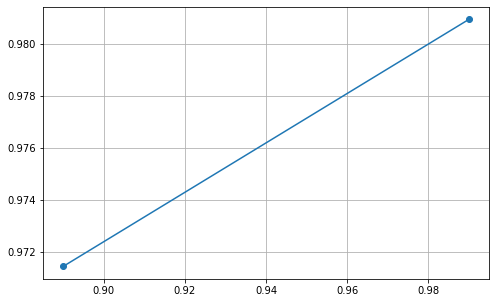

In [18]:
# INSERT your code (or comment) here
#PC which captured 89%
pca89 = PCA(n_components=3)
Xnorm = scale(data)
pca89.fit(Xnorm)
score89 = pca89.transform(Xnorm)

#Elbow for 89% Variance
distortions89 = []
K = range(1,10)
for k in K:
    kmean_pca_89 = KMeans(n_clusters=k)
    kmean_pca_89.fit(score89)
    distortions89.append(kmean_pca_89.inertia_)
    
plt.figure(figsize=(8,5))
plt.plot(K, distortions89, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for 89% Variance')
plt.grid()
plt.show()

# Elbow Method Suggests 3 clusters
kmean_pca_89 = KMeans(n_clusters=3)
kmean_pca_89.fit(score89)
centers_89 =  kmean_pca_89.cluster_centers_
labaels_89 = kmean_pca_89.labels_

centers_89
labaels_89

print('Purity Score using 3 PCA components which capture 89% Variance is {}%'.format(round(purity_score(clusters,labaels_89)*100,2)))

print('------------------------------------------')

pca99 = PCA(n_components=4)
pca99.fit(Xnorm)
score99 = pca99.transform(Xnorm)

#Elbow for 99% Variance
distortions99 = []
K = range(1,10)
for k in K:
    kmean_pca_99 = KMeans(n_clusters=k)
    kmean_pca_99.fit(score99)
    distortions99.append(kmean_pca_99.inertia_)
    
plt.figure(figsize=(8,5))
plt.plot(K, distortions89, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for 99% Variance')
plt.grid()
plt.show()

# Elbow Method Suggests 3 clusters
kmean_pca_99 = KMeans(n_clusters=3)
kmean_pca_99.fit(score99)
centers_99 =  kmean_pca_99.cluster_centers_
labaels_99 = kmean_pca_99.labels_

centers_99
labaels_99
print('Purity Score using 4 PCA components which capture 99% Variance is {}%'.format(round(purity_score(clusters,labaels_99)*100,2)))



plotdata = np.array([(0.89,0.99),(purity_score(clusters,labaels_89),purity_score(clusters,labaels_99))])
plt.figure(figsize=(8,5))
plt.plot( plotdata[0], plotdata[1], linestyle='-', marker='o')
plt.grid()
plt.show()





By looking at the graph I can conclude that Variance is directly proportional to the purity scored obtained by comparing it to the ground truth. As the we increase the variance, the purity keeps on increasing providng more accuracy.

3. Let's assume you have two datasets one is linear and another is curved structural data.
    - Can we apply PCA on these datasets? Justify your answer. __(3 marks)__ 

# INSERT your code (or comment) here

PCA is preffered to Linear Data, PCA basically transforms the data by reducing its dimensionalty. It transforms a large set of variables into a smaller on which still contains most of the information. This doesnt rule out the porribility of performing PCA on non linear data but the result wont provide any solid information. Their are other methods which are more suited to non linear data but PCA is commonly used for linear data.